# **RİSK ANKETİ**

In [9]:
def risk_survey():
    questions = [
        ("Finansal durumunuzu nasıl değerlendirirsiniz?", ["Sabit ve düşük gelirliyim", "Orta gelirliyim", "Yüksek gelirliyim ve yatırım yapmaya açığım"], [1, 3, 5]),
        ("Gelirinizin ne kadarını yatırım yapmaya ayırabilirsiniz?", ["%5 veya daha az", "%10-%20", "%30 veya daha fazla"], [1, 3, 5]),
        ("Acil bir durumda, yatırımınızı bozmadan ne kadar süre geçinebilirsiniz?", ["0-3 ay", "3-12 ay", "1 yıl veya daha fazla"], [1, 3, 5]),
        ("Yatırımlarınızın değeri %20 düştüğünde ne yaparsınız?", ["Hemen satarım", "Bir süre beklerim", "Daha fazla yatırım yaparım"], [1, 3, 5]),
        ("Yüksek getiri için yüksek risk almayı kabul eder misiniz?", ["Hayır, güvenliği tercih ederim", "Orta derecede risk alabilirim", "Evet, yüksek risk benim için sorun değil"], [1, 3, 5]),
        ("Yatırımlarınızı uzun vadede mi, kısa vadede mi değerlendirmek istersiniz?", ["Kısa vadede kazanç isterim", "3-5 yıl bekleyebilirim", "10 yıl ve daha uzun süre bekleyebilirim"], [1, 3, 5]),
        ("Yatırımlarınızdan beklediğiniz ana hedef nedir?", ["Paramı korumak", "Dengeli büyüme sağlamak", "Agresif büyüme elde etmek"], [1, 3, 5]),
        ("Finansal hedeflerinize ulaşmak için ne kadar risk almanız gerektiğini düşünüyorsunuz?", ["Düşük riskle ilerlemeliyim", "Orta seviyede risk alabilirim", "Yüksek risk almam gerekiyor"], [1, 3, 5]),
        ("Daha önce yatırım yaptınız mı?", ["Hayır, hiç yapmadım", "Evet, ama temkinli davrandım", "Evet, agresif stratejiler denedim"], [1, 3, 5]),
        ("Yaşınız kaç?", ["18-24", "25-39", "40+"], [1, 3, 5]),
    ]

    total_score = 0
    print("Risk Analizi Anketi\n")

    for i, (question, answers, scores) in enumerate(questions, 1):
        print(f"{i}. {question}")
        for j, answer in enumerate(answers, 1):
            print(f"   {j}) {answer}")
        while True:
            try:
                choice = int(input("Seçiminizi yapın (1-3): "))
                if 1 <= choice <= 3:
                    total_score += scores[choice - 1]
                    break
                else:
                    print("Lütfen 1 ile 3 arasında bir seçim yapın.")
            except ValueError:
                print("Geçerli bir sayı girin.")
        print("\n")

    print(f"Toplam Skoru: {total_score}")

    if total_score <= 15:
        return "Az Riskli"
    elif total_score <= 30:
        return "Orta Riskli"
    else:
        return "Yüksek Riskli"

# **SHARPE RATIO - GWO**

Risk Analizi Anketi

1. Finansal durumunuzu nasıl değerlendirirsiniz?
   1) Sabit ve düşük gelirliyim
   2) Orta gelirliyim
   3) Yüksek gelirliyim ve yatırım yapmaya açığım
Seçiminizi yapın (1-3): 2


2. Gelirinizin ne kadarını yatırım yapmaya ayırabilirsiniz?
   1) %5 veya daha az
   2) %10-%20
   3) %30 veya daha fazla
Seçiminizi yapın (1-3): 2


3. Acil bir durumda, yatırımınızı bozmadan ne kadar süre geçinebilirsiniz?
   1) 0-3 ay
   2) 3-12 ay
   3) 1 yıl veya daha fazla
Seçiminizi yapın (1-3): 2


4. Yatırımlarınızın değeri %20 düştüğünde ne yaparsınız?
   1) Hemen satarım
   2) Bir süre beklerim
   3) Daha fazla yatırım yaparım
Seçiminizi yapın (1-3): 2


5. Yüksek getiri için yüksek risk almayı kabul eder misiniz?
   1) Hayır, güvenliği tercih ederim
   2) Orta derecede risk alabilirim
   3) Evet, yüksek risk benim için sorun değil
Seçiminizi yapın (1-3): 2


6. Yatırımlarınızı uzun vadede mi, kısa vadede mi değerlendirmek istersiniz?
   1) Kısa vadede kazanç isterim
   2) 3-5

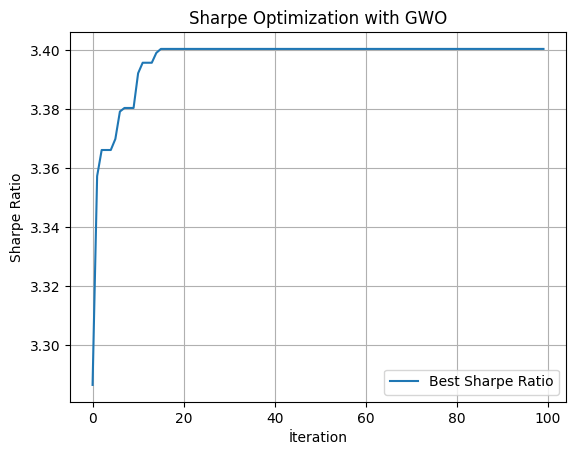

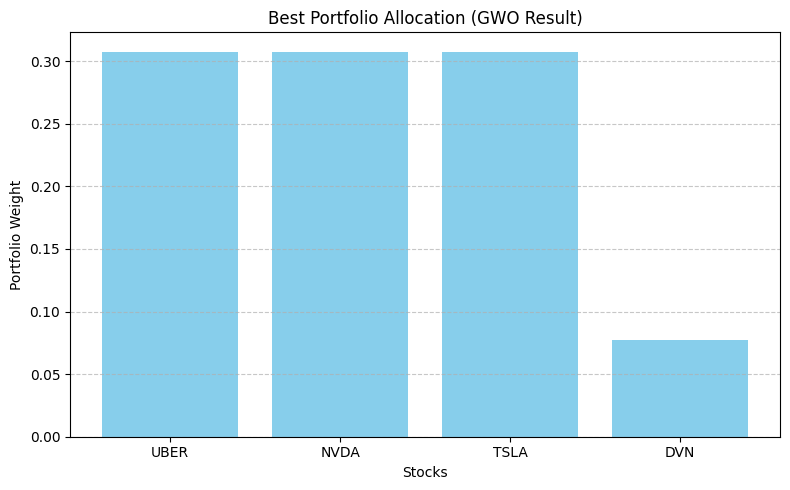

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import yfinance as yf
from datetime import datetime, timedelta


risk_level = risk_survey()

# Dosya yolları risk seviyesine göre eşleştirilir
risk_file_map = {
    "Az Riskli": "/content/drive/MyDrive/Az Riskli.csv",
    "Orta Riskli": "/content/drive/MyDrive/proje/Orta Riskli.csv",
    "Yüksek Riskli": "/content/drive/MyDrive/Yüksek Riskli.csv"
}

selected_file = risk_file_map[risk_level]

print(f"{risk_level} grubundasınız.")

# Veriyi yükle
data = pd.read_csv(selected_file, parse_dates=['Date'], index_col='Date')
returns = (data.shift(-1) - data) / data.shift(-1)
returns = returns.dropna()

# Risk-free oranı (yıllık %2, günlük oran)
risk_free_rate = 0.02
daily_risk_free = (1 + risk_free_rate)**(1/252) - 1

# --- 0.10-0.40 ARASI, TOPLAMI 1 OLAN RASTGELE 4'lü AĞIRLIKLAR ÜRET ---
def generate_weights(n_assets=4, min_weight=0.1, max_weight=0.4):
    while True:
        weights = np.random.random(n_assets)
        weights = weights / weights.sum()  # Toplamı 1 yap
        # Ensure weights are within the min/max range after normalization
        if all(min_weight <= w <= max_weight for w in weights):
            return weights

# --- AMAÇ FONKSİYONU ---
def amaç_fonksiyonu(weights):
    weights = np.array(weights)
    portfolio_returns = (returns * weights).sum(axis=1)
    std_dev = portfolio_returns.std()
    sharpe = (portfolio_returns.mean() - daily_risk_free) / std_dev * np.sqrt(21)
    return -sharpe  # Maksimimu bulmak için eksi sharpe alınıyor

# --- GWO ALGORİTMASI ---
def gwo_4boyut():
    kurt_sayısı_başlangıç = 10 # Başlangıç popülasyon büyüklüğü
    max_iterasyon = 100    # Kaç iterasyon boyunca çalışacak

    # Başlangıçta rastgele kombinasyonlar oluşturulur ve geçersiz olanlar elenir
    # Try to generate more candidates initially to increase the chance of finding enough valid ones
    initial_candidates = [generate_weights() for _ in range(kurt_sayısı_başlangıç * 100)] # Increased attempts
    kurtlar = np.array([kurt for kurt in initial_candidates if kurt is not None])

    # Eğer geçerli kurt sayısı kurt_sayısı_başlangıç'tan az ise hata ver veya tekrar oluştur
    if len(kurtlar) < kurt_sayısı_başlangıç:
        print(f"Uyarı: Yeterli sayıda geçerli başlangıç kombinasyonu oluşturulamadı. Oluşturulan kurt sayısı: {len(kurtlar)}")
        # If not enough valid wolves, stop the execution
        if len(kurtlar) == 0:
             print("Hata: Hiç geçerli başlangıç kombinasyonu oluşturulamadı. Lütfen generate_weights fonksiyonunu kontrol edin veya aralığı genişletin.")
             return # Fonksiyonu sonlandır
        # Use the valid wolves found, but update the actual population size
        kurt_sayısı = len(kurtlar)
        kurtlar = kurtlar[:kurt_sayısı] # Trim to the actual number of valid wolves
        print(f"Algoritma {kurt_sayısı} kurt ile devam ediyor.")
    else:
        # Başlangıç popülasyonundan sadece kurt_sayısı_başlangıç kadarını alalım
        kurtlar = kurtlar[:kurt_sayısı_başlangıç]
        kurt_sayısı = len(kurtlar) # Güncel kurt sayısını alıyoruz


    # Alfa, beta, delta kurtları (en iyi 3 çözüm) ve skorları başlatılır
    # Initialize with a value that will be easily replaced by any valid score
    alfa = np.zeros(4)
    beta = np.zeros(4)
    delta = np.zeros(4)
    alfa_skor = beta_skor = delta_skor = float('inf')  # Başlangıçta skorlar sonsuz

    convergence = []  # en iyi skorları tutar

    for iterasyon in range(max_iterasyon): # Her iterasyonda
        #print(f"--- {iterasyon + 1}. Iterasyon ---\n")

        # Döngüyü kurtlar array'inin mevcut boyutuna göre yapın
        for i in range(len(kurtlar)):  # Her kurdun pozisyonuna göre skor hesaplanır
            skor = amaç_fonksiyonu(kurtlar[i]) # Amaç fonksiyonu değeri
            #print(f"Kurt {i + 1} pozisyonu: {kurtlar[i]}, Skor: {skor:.6f}")

            # En iyi üç kurt güncellenir
            if skor < alfa_skor:  # Yeni en iyi skor bulunduysa
                delta, delta_skor = beta.copy(), beta_skor  # Önce delta güncellenir
                beta, beta_skor = alfa.copy(), alfa_skor    # Sonra beta
                alfa, alfa_skor = kurtlar[i].copy(), skor   # Son olarak alfa atanır
            elif skor < beta_skor:  # Alfa'dan kötü ama beta'dan iyi skor
                delta, delta_skor = beta.copy(), beta_skor
                beta, beta_skor = kurtlar[i].copy(), skor
            elif skor < delta_skor:  # Delta'dan daha iyi skor
                delta, delta_skor = kurtlar[i].copy(), skor

        # Alfa, beta, delta bilgileri yazdırılır
        #print(f"\nAlfa: {alfa}, Skor: {alfa_skor:.6f}")
        #print(f"Beta: {beta}, Skor: {beta_skor:.6f}")
        #print(f"Delta: {delta}, Skor: {delta_skor:.6f}\n")

        convergence.append(-alfa_skor)  # - koyularak maksimize edildi.

        a = 2 - iterasyon * (2 / max_iterasyon)  # a değeri her iterasyonda azalır (keşiften sömürüye geçiş)

        # Döngüyü kurtlar array'inin mevcut boyutuna göre yapın
        for i in range(len(kurtlar)): # Her kurdun pozisyonu güncellenir
            for j in range(4): # 4 boyut için güncelleme yapılır
                A1, C1 = 2 * a * np.random.rand() - a, 2 * np.random.rand()
                A2, C2 = 2 * a * np.random.rand() - a, 2 * np.random.rand()
                A3, C3 = 2 * a * np.random.rand() - a, 2 * np.random.rand()

                # kurtlar[i, j] ifadesi hala geçerli olmalı çünkü i len(kurtlar) içinde
                D_alpha = abs(C1 * alfa[j] - kurtlar[i, j])
                D_beta = abs(C2 * beta[j] - kurtlar[i, j])
                D_delta = abs(C3 * delta[j] - kurtlar[i, j])

                X1 = alfa[j] - A1 * D_alpha
                X2 = beta[j] - A2 * D_beta
                X3 = delta[j] - A3 * D_delta

                # Yeni pozisyon bu üç etkiden ortalama alınarak belirlenir
                kurtlar[i, j] = (X1 + X2 + X3) / 3

            # Pozisyonlar sınır içinde mi kontrol edilir ve toplamları 1.0 yapılır
            # Apply boundary constraints
            kurtlar[i] = np.clip(kurtlar[i], 0.1, 0.4)

            # Normalize weights so they sum to 1
            total_weight = np.sum(kurtlar[i])
            if total_weight != 0: # Avoid division by zero if all weights are 0 after clipping (unlikely but good practice)
                 kurtlar[i] = kurtlar[i] / total_weight
            else:
                 # If for some reason the sum is zero, regenerate weights for this wolf
                 kurtlar[i] = generate_weights()


        #print("\n")

    hisse_adlari = data.columns.tolist()  # Hisse adlarını al

    print("\n--- GWO SONUÇLARI ---\n")
    final_sharpe = -amaç_fonksiyonu(alfa)
    print("Best Solution (alpha):")
    for i in range(len(alfa)):
        print(f"{hisse_adlari[i]}: {alfa[i]:.2f}")
    print(f"\nBest Sharpe Ratio: {final_sharpe:.6f}\n")

    plt.plot(convergence, label="Best Sharpe Ratio")
    plt.xlabel("İteration")
    plt.ylabel("Sharpe Ratio")
    plt.title("Sharpe Optimization with GWO")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Hisse ağırlıklarını bar grafik ile görselleştir
    plt.figure(figsize=(8, 5))
    plt.bar(hisse_adlari, alfa, color='skyblue')
    plt.xlabel("Stocks")
    plt.ylabel("Portfolio Weight")
    plt.title("Best Portfolio Allocation (GWO Result)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- Algoritmayı çalıştır ---
gwo_4boyut()

# **STOK VERİ ÇEKME & 30 GÜN TAHMİN**


UBER HİSSE TAHMİN SİSTEMİ

UBER hisse verisi çekiliyor...
1362 günlük veri çekildi (Son fiyat: 82.53$)
Teknik göstergeler hesaplanıyor...
Veri ön işleme yapılıyor...
Veri boyutları - Eğitim: (1026, 60, 7), Test: (257, 60, 7)
LSTM modeli oluşturuluyor...


<ipython-input-5-8e63ec5a52a9>:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_price = float(data['Kapanış'].iloc[-1])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,393 (122.63 KB)

 Non-trainable params: 0 (0.00 B)

Model eğitimi başlıyor...
Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.1195 - val_loss: 0.0729 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0098 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0049 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0042 - val_loss: 0.0098 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0036 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0044 - val_loss: 0.0058 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0029 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0030 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0028 - val_loss: 0.0084 - learni

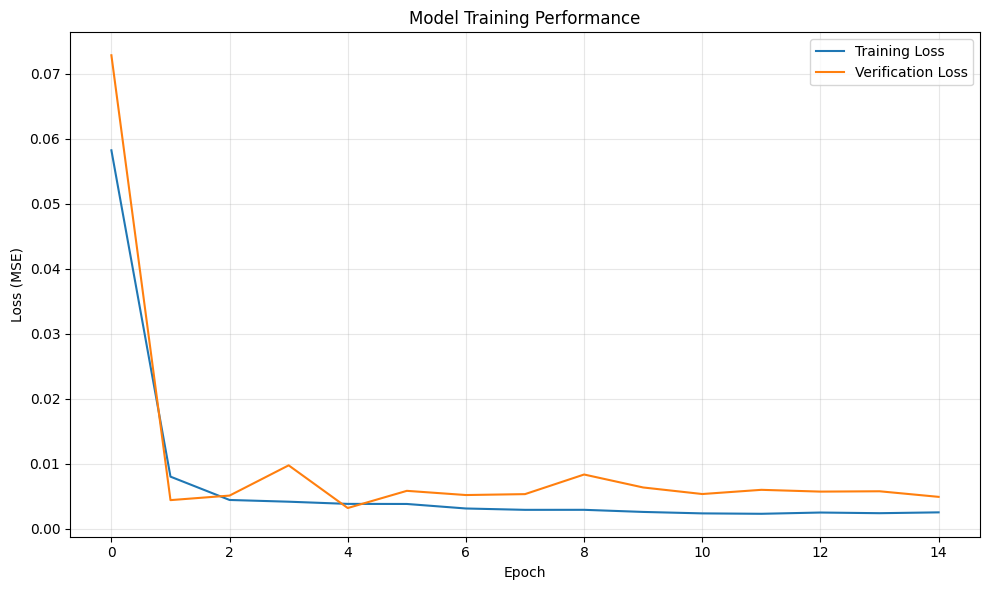

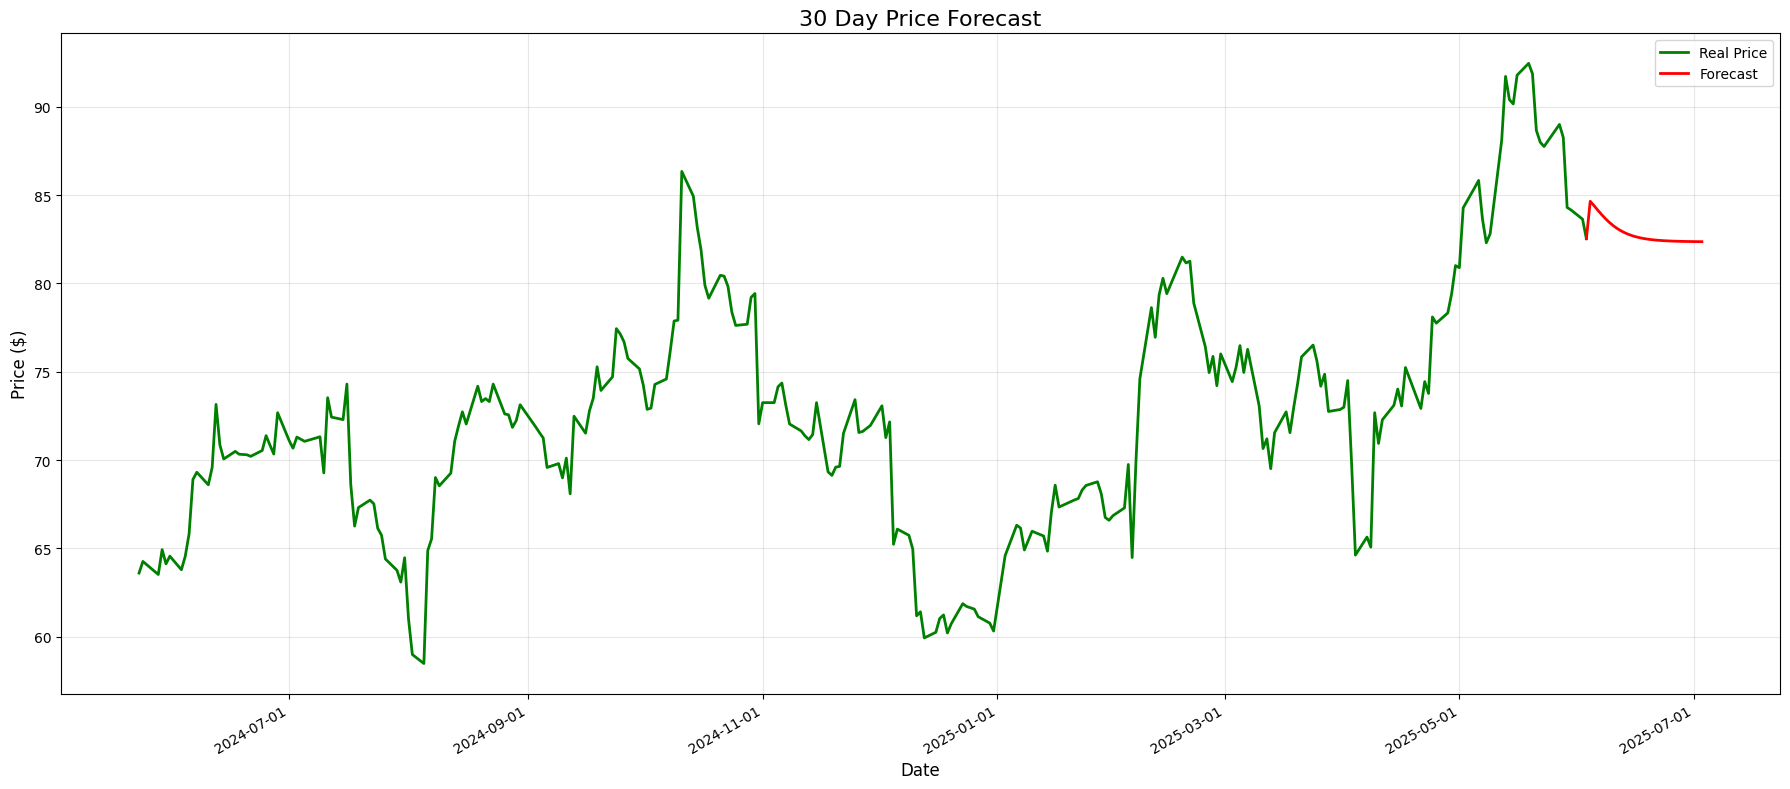

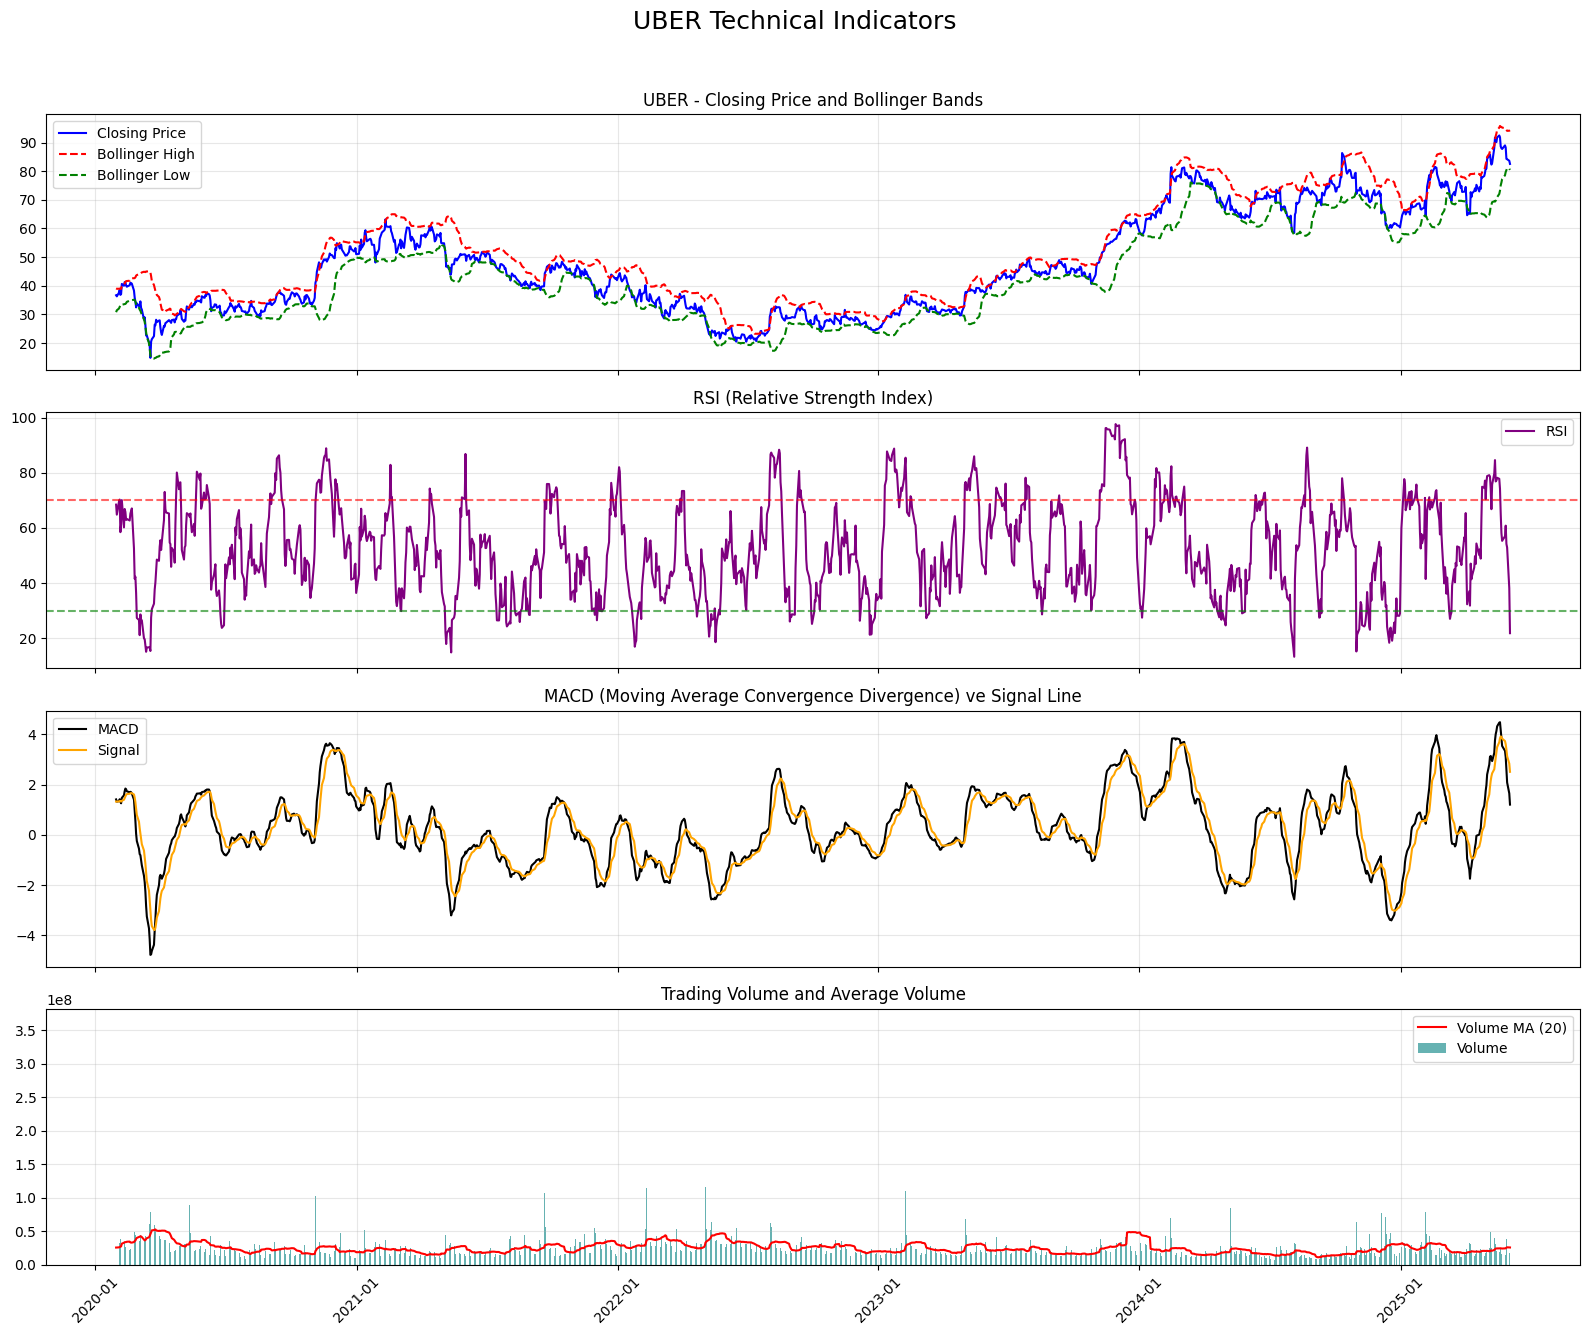


Tahmin Sonuçları:
     Tarih    Tahmin
2025-06-05 84.650715
2025-06-06 84.399722
2025-06-07 84.138826
2025-06-08 83.887394
2025-06-09 83.655370
2025-06-10 83.447702
2025-06-11 83.265967
2025-06-12 83.109616
2025-06-13 82.976851
2025-06-14 82.865356
2025-06-15 82.772483
2025-06-16 82.695695
2025-06-17 82.632545
2025-06-18 82.580849
2025-06-19 82.538672
2025-06-20 82.504367
2025-06-21 82.476522
2025-06-22 82.453958
2025-06-23 82.435688
2025-06-24 82.420911
2025-06-25 82.408907
2025-06-26 82.399087
2025-06-27 82.391053
2025-06-28 82.384445
2025-06-29 82.379026
2025-06-30 82.374556
2025-07-01 82.370858
2025-07-02 82.367790
2025-07-03 82.365226
2025-07-04 82.363042

Analiz tamamlandı. Sonuçlar kaydedildi:
- tahminler.csv (Tahmin verileri)
- tahmin_tablosu.png (Tahmin tablosu)
- fiyat_tahmini_grafik.png (Fiyat grafiği)
- egitim_performansi.png (Eğitim performansı)


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# 1. VERİ ÇEKME FONKSİYONU
def get_stock_data(ticker, start_date, end_date):
    print(f"{ticker} hisse verisi çekiliyor...")
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        if data.empty:
            raise ValueError("Veri çekilemedi - boş DataFrame döndü")

        data.reset_index(inplace=True)
        data.rename(columns={
            'Date': 'Tarih',
            'Open': 'Açılış',
            'High': 'Yüksek',
            'Low': 'Düşük',
            'Close': 'Kapanış',
            'Adj Close': 'Düzeltilmiş_Kapanış',
            'Volume': 'Hacim'
        }, inplace=True)

        data['Tarih'] = pd.to_datetime(data['Tarih'])
        last_price = float(data['Kapanış'].iloc[-1])
        print(f"{len(data)} günlük veri çekildi (Son fiyat: {last_price:.2f}$)")
        return data

    except Exception as e:
        print(f"Hata: {str(e)}")
        return None

# 2. TEKNİK GÖSTERGELER
def calculate_technical_indicators(data):
    print("Teknik göstergeler hesaplanıyor...")
    try:
        delta = data['Kapanış'].diff(1)
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(14).mean()
        avg_loss = loss.rolling(14).mean()
        rs = avg_gain / avg_loss
        data['RSI'] = 100 - (100 / (1 + rs))

        exp12 = data['Kapanış'].ewm(span=12, adjust=False).mean()
        exp26 = data['Kapanış'].ewm(span=26, adjust=False).mean()
        data['MACD'] = exp12 - exp26
        data['Sinyal'] = data['MACD'].ewm(span=9, adjust=False).mean()

        sma20 = data['Kapanış'].rolling(20).mean()
        std20 = data['Kapanış'].rolling(20).std()
        data['Bollinger_Üst'] = sma20 + (2 * std20)
        data['Bollinger_Alt'] = sma20 - (2 * std20)

        data['Hacim_MA'] = data['Hacim'].rolling(20).mean()
        data.dropna(inplace=True)
        data.to_csv("technical_indicators.csv", index=False)
        return data

    except Exception as e:
        print(f"Teknik gösterge hesaplama hatası: {str(e)}")
        return None

def plot_technical_indicators(data, ticker):
    try:
        # MultiIndex sütunlarını düzleştir
        if isinstance(data.columns, pd.MultiIndex):
            data.columns = [
                'Tarih' if col[0] == 'Tarih' else f'{col[0]}_{col[1]}' for col in data.columns
            ]

        # 'Tarih' sütunu datetime değilse dönüştür
        if not pd.api.types.is_datetime64_any_dtype(data['Tarih']):
            data['Tarih'] = pd.to_datetime(data['Tarih'])

        # Sütun adlarını yeniden adlandır
        rename_dict = {
            f'Kapanış_{ticker}': 'Kapanış',
            f'Yüksek_{ticker}': 'Yüksek',
            f'Düşük_{ticker}': 'Düşük',
            f'Açılış_{ticker}': 'Açılış',
            f'Hacim_{ticker}': 'Hacim',
            'RSI_': 'RSI',
            'MACD_': 'MACD',
            'Sinyal_': 'Sinyal',
            'Bollinger_Üst_': 'Bollinger_Üst',
            'Bollinger_Alt_': 'Bollinger_Alt',
            'Hacim_MA_': 'Hacim_MA'
        }

        data.rename(columns=rename_dict, inplace=True)

        # Gerekli sütunlar var mı kontrol et
        required_columns = ['Tarih', 'Kapanış', 'Bollinger_Üst', 'Bollinger_Alt',
                            'RSI', 'MACD', 'Sinyal', 'Hacim', 'Hacim_MA']
        for col in required_columns:
            if col not in data.columns:
                raise KeyError(f"'{col}' sütunu eksik.")

        # Grafik çizimi
        fig, axs = plt.subplots(4, 1, figsize=(16, 14), sharex=True)

        # Kapanış ve Bollinger çizgileri
        axs[0].plot(data['Tarih'], data['Kapanış'], label='Closing Price', color='blue')
        axs[0].plot(data['Tarih'], data['Bollinger_Üst'], label='Bollinger High', linestyle='--', color='red')
        axs[0].plot(data['Tarih'], data['Bollinger_Alt'], label='Bollinger Low', linestyle='--', color='green')
        axs[0].set_title(f'{ticker} - Closing Price and Bollinger Bands')
        axs[0].legend()
        axs[0].grid(alpha=0.3)

        # RSI
        axs[1].plot(data['Tarih'], data['RSI'], label='RSI', color='purple')
        axs[1].axhline(70, linestyle='--', color='red', alpha=0.6)
        axs[1].axhline(30, linestyle='--', color='green', alpha=0.6)
        axs[1].set_title('RSI (Relative Strength Index)')
        axs[1].legend()
        axs[1].grid(alpha=0.3)

        # MACD
        axs[2].plot(data['Tarih'], data['MACD'], label='MACD', color='black')
        axs[2].plot(data['Tarih'], data['Sinyal'], label='Signal', color='orange')
        axs[2].set_title('MACD (Moving Average Convergence Divergence) ve Signal Line')
        axs[2].legend()
        axs[2].grid(alpha=0.3)

        # Hacim
        axs[3].bar(data['Tarih'], data['Hacim'], label='Volume', color='teal', alpha=0.6)
        axs[3].plot(data['Tarih'], data['Hacim_MA'], label='Volume MA (20)', color='red')
        axs[3].set_title('Trading Volume and Average Volume')
        axs[3].legend()
        axs[3].grid(alpha=0.3)

        for ax in axs:
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            ax.tick_params(axis='x', rotation=45)

        plt.suptitle(f'{ticker.upper()} Technical Indicators', fontsize=18)
        plt.tight_layout(rect=[0, 0.03, 1, 0.96])
        plt.savefig(f'{ticker.upper()}_technical_indicators.png', dpi=300)
        plt.show()

    except Exception as e:
        print(f"Teknik gösterge grafiği çizme hatası: {str(e)}")

# 3. VERİ HAZIRLAMA
def prepare_data(data):
    print("Veri ön işleme yapılıyor...")
    try:
        features = ['Kapanış', 'RSI', 'MACD', 'Sinyal', 'Bollinger_Üst', 'Bollinger_Alt', 'Hacim_MA']
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(data[features])

        X, y = [], []
        seq_length = 60

        for i in range(len(scaled_data) - seq_length):
            X.append(scaled_data[i:i+seq_length])
            y.append(scaled_data[i+seq_length, 0])

        X, y = np.array(X), np.array(y)

        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        print(f"Veri boyutları - Eğitim: {X_train.shape}, Test: {X_test.shape}")
        return X_train, X_test, y_train, y_test, scaler, features

    except Exception as e:
        print(f"Veri hazırlama hatası: {str(e)}")
        return None, None, None, None, None, None

# 4. LSTM MODELİ
def build_lstm_model(input_shape):
    print("LSTM modeli oluşturuluyor...")
    try:
        model = Sequential([
            LSTM(64, return_sequences=True, input_shape=input_shape),
            Dropout(0.2),
            LSTM(32),
            Dropout(0.2),
            Dense(16, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.summary()
        return model
    except Exception as e:
        print(f"Model oluşturma hatası: {str(e)}")
        return None

# 5. TAHMİN FONKSİYONU VE KAYDETME
def predict_and_save_results(model, last_sequence, scaler, features, ticker, days=30):
    print(f"Önümüzdeki {days} gün için tahmin yapılıyor...")
    try:
        temp_input = last_sequence[-60:].copy()
        predictions = []
        dates = []

        current_date = datetime.today()

        for _ in range(days):
            pred = model.predict(temp_input.reshape(1, 60, len(features)), verbose=0)[0,0]
            predictions.append(float(pred))

            new_row = np.concatenate([[pred], temp_input[-1, 1:]])
            temp_input = np.concatenate([temp_input[1:], [new_row]])

            current_date += timedelta(days=1)
            dates.append(current_date.strftime('%Y-%m-%d'))

        # Tahminleri orijinal ölçeğe çevir
        predictions = np.array(predictions).reshape(-1, 1)
        dummy_features = np.zeros((len(predictions), len(features)-1))
        predictions = scaler.inverse_transform(np.concatenate((predictions, dummy_features), axis=1))[:,0]

        # DataFrame oluştur
        df_predictions = pd.DataFrame({
            'Tarih': dates,
            'Tahmin': predictions
        })

        # Dosya adı belirle (örneğin: UBER_PREDICTION.csv)
        file_prefix = ticker.upper().replace('.', '_')
        csv_filename = f"{file_prefix}_PREDICTION.csv"
        image_filename = f"{file_prefix}_TABLE.png"

        # CSV olarak kaydet
        df_predictions.to_csv(csv_filename, index=False, encoding='utf-8-sig')

        # Tabloyu resim olarak kaydet
        fig, ax = plt.subplots(figsize=(12, 4))
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=df_predictions.values,
                         colLabels=df_predictions.columns,
                         cellLoc='center',
                         loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)
        plt.title(f'{days} Daily Forecast ({ticker.upper()})', pad=20)
        plt.savefig(image_filename, bbox_inches='tight', dpi=300)
        plt.close()

        print(f"Tahminler '{csv_filename}' ve '{image_filename}' olarak kaydedildi")
        return df_predictions

    except Exception as e:
        print(f"Tahmin hatası: {str(e)}")
        return None

# 6. GÖRSELLEŞTİRME FONKSİYONLARI
def plot_price_and_forecast(data, y_test_actual, future_predictions, forecast_days):
    plt.figure(figsize=(18, 8))

    test_start_index = len(data) - len(y_test_actual)
    test_dates = data['Tarih'].iloc[test_start_index:].reset_index(drop=True)
    last_date = test_dates.iloc[-1]

    future_dates = [last_date + timedelta(days=i) for i in range(1, forecast_days+1)]

    plt.plot(test_dates, y_test_actual, color='green', linewidth=2, label='Real Price')
    plt.plot([last_date] + future_dates, [y_test_actual[-1]] + list(future_predictions),
             color='red', linewidth=2, label='Forecast')

    plt.title('30 Day Price Forecast', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.savefig('fiyat_tahmini_grafik.png', dpi=300)
    plt.show()

def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Verification Loss')
    plt.title('Model Training Performance')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('egitim_performansi.png', dpi=300)
    plt.show()

# ANA FONKSİYON
def full_stock_analysis(ticker, start_date, forecast_days=30):
    end_date = datetime.today().strftime('%Y-%m-%d')
    print(f"\n{'='*50}")
    print(f"{ticker} HİSSE TAHMİN SİSTEMİ")
    print(f"{'='*50}\n")

    try:
        df = get_stock_data(ticker, start_date, end_date)
        if df is None:
            raise ValueError("Veri çekilemedi")

        df = calculate_technical_indicators(df)
        if df is None:
            raise ValueError("Teknik göstergeler hesaplanamadı")

        X_train, X_test, y_train, y_test, scaler, features = prepare_data(df)
        if X_train is None:
            raise ValueError("Veri hazırlanamadı")

        model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
        if model is None:
            raise ValueError("Model oluşturulamadı")

        print("Model eğitimi başlıyor...")
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=100,
            batch_size=32,
            callbacks=[
                EarlyStopping(patience=10, restore_best_weights=True),
                ReduceLROnPlateau(patience=5)
            ],
            verbose=1
        )

        test_predict = model.predict(X_test)
        test_predict = scaler.inverse_transform(
            np.concatenate([test_predict, np.zeros((test_predict.shape[0], len(features)-1))], axis=1)
        )[:, 0]

        y_test_actual = scaler.inverse_transform(
            np.concatenate([y_test.reshape(-1,1), np.zeros((len(y_test), len(features)-1))], axis=1)
        )[:, 0]

        future_df = predict_and_save_results(model, X_test[-1], scaler, features, ticker, days=forecast_days)

        plot_training_history(history)
        plot_price_and_forecast(df, y_test_actual, future_df['Tahmin'].values, forecast_days)
        plot_technical_indicators(df, ticker)

        print("\nTahmin Sonuçları:")
        print(future_df.to_string(index=False))
        print("\nAnaliz tamamlandı. Sonuçlar kaydedildi:")
        print("- tahminler.csv (Tahmin verileri)")
        print("- tahmin_tablosu.png (Tahmin tablosu)")
        print("- fiyat_tahmini_grafik.png (Fiyat grafiği)")
        print("- egitim_performansi.png (Eğitim performansı)")

    except Exception as e:
        print(f"Analiz sırasında hata oluştu: {str(e)}")

# ÇALIŞTIRMA ÖRNEĞİ
if __name__ == "__main__":
    full_stock_analysis('UBER', '2020-01-01', forecast_days=30)

# **SHARPE RATIO - RANDOM WEIGHTS**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


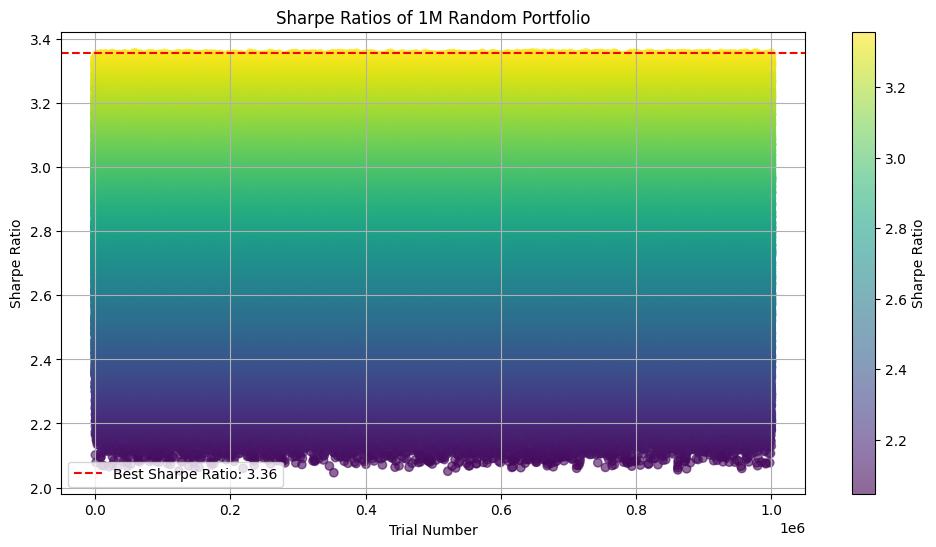


Best Portfolio:
UBER: 12.55%
NVDA: 39.62%
TSLA: 37.83%
DVN: 10.01%
Sharpe Oranı: 3.3570


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Veriyi yükle
data = pd.read_csv('/content/drive/MyDrive/proje/Orta Riskli.csv', parse_dates=['Date'], index_col='Date')

# Günlük getirileri hesapla
returns = (data.shift(-1) - data) / data.shift(-1)
returns = returns.dropna()

# Risk-free oranı (yıllık %2 günlüğe çevirme)
risk_free_rate = 0.02
daily_risk_free = (1 + risk_free_rate)**(1/252) - 1

# Rastgele ağırlıklar oluşturma (min %10, max %40)
def generate_weights(n_assets=4, min_weight=0.1, max_weight=0.4):
    while True:
        weights = np.random.random(n_assets)
        weights = weights / weights.sum()  # Toplamı 1 yap
        if all(min_weight <= w <= max_weight for w in weights):
            return weights

# 1000000 iterasyon için Sharpe Oranlarını hesapla
sharpe_ratios = []
weights_history = []

for _ in range(1000000):
    weights = generate_weights()
    portfolio_returns = (returns * weights).sum(axis=1)
    sharpe_ratio = (portfolio_returns.mean() - daily_risk_free) / portfolio_returns.std() * np.sqrt(21)
    sharpe_ratios.append(sharpe_ratio)
    weights_history.append(weights)

# En iyi performans gösteren portföyü bul
best_idx = np.argmax(sharpe_ratios)
best_sharpe = sharpe_ratios[best_idx]
best_weights = weights_history[best_idx]

# Sonuçları görselleştir
plt.figure(figsize=(12, 6))
plt.scatter(range(1000000), sharpe_ratios, alpha=0.6, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.axhline(y=best_sharpe, color='r', linestyle='--', label=f'Best Sharpe Ratio: {best_sharpe:.2f}')
plt.title('Sharpe Ratios of 1M Random Portfolio')
plt.xlabel('Trial Number')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.show()

# En iyi portföyü yazdır
print("\nBest Portfolio:")
for ticker, weight in zip(data.columns, best_weights):
    print(f"{ticker}: {weight:.2%}")
print(f"Sharpe Oranı: {best_sharpe:.4f}")